# IMPLEMENTING DECISION TREE CLASSIFIER USING ID3 ALGORITHM FROM SCRATCH AND APPLYING IT ON THE IRIS DATASET

#### Hyper parameters are:
#### criterion = ('entropy' , 'gini')
#### min_samples = 2(default)
#### max_depth = None(default)

## Importing necessary libraries

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from pprint import pprint
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

In [29]:
class Decision_Tree_Classifier:
    def __init__(self, criterion = 'entropy', min_samples = 2, max_depth = None):
        self.criterion = criterion
        self.min_samples = min_samples
        self.max_depth = max_depth
        print(f'Criterion: {self.criterion}')
        print(f'Minimum samples for split: {self.min_samples}')
        print(f'Maximum depth of Tree: {self.max_depth}')
        
    #function to fit the tree to the given data---------------------------------------------------------------------    
    def fit(self, X, y):
        self.tree = 0
        self.depth = 0
        self.X = X
        self.y = y
        data = np.concatenate([self.X, self.y.reshape(1,-1).T], axis = 1)
        return pprint(self.create_tree(data))
        

    #function to calculate the entropy for a dataset or subset------------------------------------------------------
    def entropy(self, data):
        label_column = data[:,-1]
        data_labels, counts_label = np.unique(label_column, return_counts = True)
        
        return sum(counts_label/sum(counts_label) * - np.log2(counts_label/sum(counts_label)))
        
        

    #function to check if the class distribution is homogenious or not----------------------------------------------
    def check_purity(self, data):
        label_column = data[:,-1]
        data_labels, counts_label = np.unique(label_column, return_counts = True)
        
        if len(data_labels) == 1:
            return True
        else:
            return False
    
    #function to return prevailing class label----------------------------------------------------------------------    
    def classify(self,data):
        label_column = data[:,-1]
        data_labels, counts_label = np.unique(label_column, return_counts = True)
        index = np.argmax(counts_label)
        
        return data_labels[index]
    
    #function to find the split values for the features in the given data------------------------------------------ 
    def potential_splits(self, data):
        splits = {}
    
        _, features = data.shape
        for column in range(features - 1):
            unique_values = np.unique(data[:, column])
            splits[column]=[]
            for i in range(len(unique_values)-1):
                splits[column].append((unique_values[i] + unique_values[i+1])/2)

        return splits
    
    #funtion to split the dataset based on the potential splits----------------------------------------------------
    def split_data(self, data, feature, attribute_split):
        
        data_above = data[data[:, feature] <= attribute_split ]
        data_below = data[data[:, feature] > attribute_split ]
        
        return data_above, data_below
    
    #function the calculate the information gain-------------------------------------------------------------------
    def information_gain(self, data_above, data_below, entropy):
        total = len(data_above) + len(data_below)
        p_data_below = len(data_below) / total
        p_data_above = len(data_above) / total
        entropy_after_split = p_data_above * self.entropy(data_above) + p_data_below * self.entropy(data_below)

        return entropy - entropy_after_split
        
    #function to find the best splitting node in the decision tree-------------------------------------------------        
    def best_split(self, data):
        best_info_gain = None
        best_feature = None
        best_attribute = None
        current_entropy = self.entropy(data)
        splits = self.potential_splits(data)
        for feature in splits:
            for attribute_split in splits[feature]:
                #split the data into two based on the current feature--------------------------------------------
                data_above, data_below = self.split_data( data, feature, attribute_split)
                #calulate information gain for each split 
                info_gain = self.information_gain(data_above, data_below, current_entropy)
                #find the best feature and attribute value
                if  best_info_gain == None or info_gain >= best_info_gain:
                    best_info_gain = info_gain
                    best_feature = feature
                    best_attribute = attribute_split
                    
        return  best_feature, best_attribute
    
    #function to create a leaf node--------------------------------------------------------------------------------
    def create_leaf(self, data):
        leaf = self.classify(data)
        return leaf
    
    #function to implement the decsion tree algorithm--------------------------------------------------------------
    def create_tree(self, data):
        # if data is pure or len(data) is lesser than minimum samples or depth == maxdepth, create a leaf node.
        if self.check_purity(data) or len(data) < self.min_samples or self.depth == self.max_depth:
            leaf = self.create_leaf(data)
            return leaf
        # if data is not pure, then recursively split the data until pure datasets are created
        else:
            #print('recurse')
            best_feature, best_attribute = self.best_split(data)
            data_left, data_right = self.split_data(data, best_feature, best_attribute)
            #increase depth by 1 for every split
            self.depth+=1
            #create the tree
            node = f'X[{best_feature}] <= {best_attribute}'
            tree = {node:[]}

            
            If_true = self.create_tree(data_left)
            If_false = self.create_tree(data_right)
            
            tree[node].append(If_true)
            tree[node].append(If_false)
            
        self.tree = tree    
        return self.tree
    
    #function to predict a sample---------------------------------------------------------------------------------            
    def predict(self, sample, traverse = False):
        if traverse == False:
            traverse_tree = self.tree
        else:
            traverse_tree = traverse
        
        feature, equality, attribute = list(traverse_tree.keys())[0].split()
        feature = int(feature[2:-1])
        attribute = float(attribute)
        node = list(traverse_tree.keys())[0]
        
        if sample[feature] <= attribute:
            answer = traverse_tree[node][0]
        else:
            answer = traverse_tree[node][1]
        
        if not isinstance(answer, dict):
            return answer
        else:
            traverse_tree = answer
            return self.predict(sample, traverse = answer)
            
        
    #function to calculate the accuracy of the model---------------------------------------------------------------    
    def score( self, xtest, ytest):
        correctly_predicted = 0
        for test_query, test_label in zip(xtest, ytest):
            if self.predict(test_query) == test_label:
                correctly_predicted+=1
        return correctly_predicted/ ytest.shape[0]  
            

## Let's use the playtennis dataset as a sample dataset

In [30]:
tennis = pd.read_csv('play_tennis.csv')
tennis = tennis.drop('day', axis =1)
tennis

,outlook,temp,humidity,wind,play
0,Sunny,Hot,High,Weak,No
1,Sunny,Hot,High,Strong,No
2,Overcast,Hot,High,Weak,Yes
3,Rain,Mild,High,Weak,Yes
4,Rain,Cool,Normal,Weak,Yes
5,Rain,Cool,Normal,Strong,No
6,Overcast,Cool,Normal,Strong,Yes
7,Sunny,Mild,High,Weak,No
8,Sunny,Cool,Normal,Weak,Yes
9,Rain,Mild,Normal,Weak,Yes


## preprocess the data 

In [31]:
clf = OrdinalEncoder()
data = clf.fit_transform(tennis)
data

array([[2., 1., 0., 1., 0.],
       [2., 1., 0., 0., 0.],
       [0., 1., 0., 1., 1.],
       [1., 2., 0., 1., 1.],
       [1., 0., 1., 1., 1.],
       [1., 0., 1., 0., 0.],
       [0., 0., 1., 0., 1.],
       [2., 2., 0., 1., 0.],
       [2., 0., 1., 1., 1.],
       [1., 2., 1., 1., 1.],
       [2., 2., 1., 0., 1.],
       [0., 2., 0., 0., 1.],
       [0., 1., 1., 1., 1.],
       [1., 2., 0., 0., 0.]])

## Let's instantiate the classifier

In [32]:
clf = Decision_Tree_Classifier(criterion = 'entropy', min_samples = 2, max_depth = None)

Criterion: entropy
Minimum samples for split: 2
Maximum depth of Tree: None


## Verifying the methods

In [33]:
clf.check_purity(data)

False

In [34]:
clf.entropy(data)

0.9402859586706309

In [35]:
clf.classify(data)

1.0

In [36]:
clf.potential_splits(data)

{0: [0.5, 1.5], 1: [0.5, 1.5], 2: [0.5], 3: [0.5]}

In [37]:
# best feature is 0th feature in the data and best attribute is X[0] <= 0.5
clf.best_split(data)

(0, 0.5)

## Let's fit our model to the data

In [38]:
X= data[:,:-1]
y =data[:, -1]
print(X, y)

[[2. 1. 0. 1.]
 [2. 1. 0. 0.]
 [0. 1. 0. 1.]
 [1. 2. 0. 1.]
 [1. 0. 1. 1.]
 [1. 0. 1. 0.]
 [0. 0. 1. 0.]
 [2. 2. 0. 1.]
 [2. 0. 1. 1.]
 [1. 2. 1. 1.]
 [2. 2. 1. 0.]
 [0. 2. 0. 0.]
 [0. 1. 1. 1.]
 [1. 2. 0. 0.]] [0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0.]


In [39]:
# returns the final tree in the form of a dictionary. 
# each subtree is enclosed within a dictionary and the child nodes are enclosed within the list
clf.fit(X, y)

{'X[0] <= 0.5': [1.0,
                 {'X[2] <= 0.5': [{'X[0] <= 1.5': [{'X[3] <= 0.5': [0.0, 1.0]},
                                                   0.0]},
                                  {'X[3] <= 0.5': [{'X[1] <= 1.0': [0.0, 1.0]},
                                                   1.0]}]}]}


## Accuracy 

In [40]:
Xtest= data[-4:,:-1]
ytest =data[-4:, -1]
print(Xtest, ytest)

[[2. 2. 1. 0.]
 [0. 2. 0. 0.]
 [0. 1. 1. 1.]
 [1. 2. 0. 0.]] [1. 1. 1. 0.]


In [41]:
clf.score(Xtest, ytest)

1.0

## Let's now import the Iris dataset

In [42]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris_data = load_iris()
iris_features = iris_data.data
iris_target = iris_data.target

In [43]:
# sepal_length, sepal_width, petal_length, petal_width
iris_features[:5,:]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [44]:
# 0 = setosa, 1 = versicolor, 2 = virginica
iris_target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [45]:
X_train, X_test, y_train, y_test = train_test_split(iris_features, iris_target, test_size=0.2, random_state = 1)

In [46]:
model = Decision_Tree_Classifier(criterion = 'entropy', min_samples = 2, max_depth = None)

Criterion: entropy
Minimum samples for split: 2
Maximum depth of Tree: None


In [47]:
# final tree for iris data_set
model.fit(X_train, y_train)

{'X[3] <= 0.8': [0.0,
                 {'X[3] <= 1.65': [{'X[2] <= 4.95': [1.0,
                                                     {'X[3] <= 1.55': [2.0,
                                                                       {'X[2] <= 5.449999999999999': [1.0,
                                                                                                      2.0]}]}]},
                                   {'X[2] <= 4.85': [{'X[1] <= 3.1': [2.0,
                                                                      1.0]},
                                                     2.0]}]}]}


In [48]:
model.score(X_test, y_test)

0.9666666666666667

## Verifying with sklearn's DecisionTree model

In [49]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.tree import export_graphviz
from sklearn.preprocessing import OrdinalEncoder
import graphviz
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


iris_data = load_iris()
iris_features = iris_data.data
iris_target = iris_data.target

X_train, X_test, y_train, y_test = train_test_split(iris_features, iris_target, test_size=0.2, random_state = 1)

tree1 = DecisionTreeClassifier(criterion = 'entropy').fit(X_train, y_train)

In [50]:
tree1.score(X_test, y_test)

0.9666666666666667

## Now let's display the decision tree for the above model using graphviz and tree_plot

In [51]:
#Creates a dot file in the current directory
export_graphviz(tree1, out_file="mytree.dot")
with open("mytree.dot") as f:
    dot_graph = f.read()
graph = graphviz.Source(dot_graph)

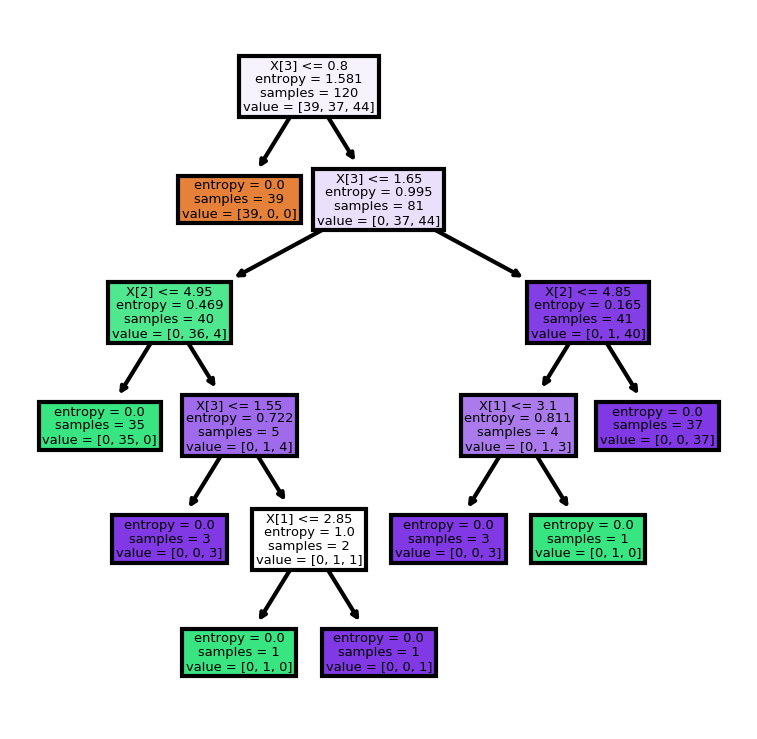

In [52]:
# Using the tree.plot_tree function to plot the decision tree with matplotlib
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (3,3), dpi=300)
tree.plot_tree(tree1, filled = True)
fig.savefig('tree.png')